In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_ncdlbp_clockwise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    ncdlbp_clockwise = np.zeros((rows, cols), dtype=np.uint8)  
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan searah jarum jam mulai dari 3 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                         gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1], gray[i - 1, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_clockwise[i, j] = code
    
    return ncdlbp_clockwise


def calculate_ncdlbp_anticlockwise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    ncdlbp_anticlockwise = np.zeros((rows, cols), dtype=np.uint8)  
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j - 1], gray[i, j - 1],
                         gray[i + 1, j - 1], gray[i + 1, j], gray[i + 1, j + 1],
                         gray[i, j + 1], gray[i - 1, j + 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_anticlockwise[i, j] = code
    
    return ncdlbp_anticlockwise


In [31]:
# Load gambar
image_path = 'img.jpg'
image = cv2.imread(image_path)

clockwise_res = calculate_ncdlbp_clockwise(image)
print(clockwise_res)

# Tampilkan hasil
cv2.imshow('Image', image)
cv2.imshow('NCD-LBP Result', clockwise_res)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[  0   0   0 ...   0   0   0]
 [  0 240 240 ... 227 225   0]
 [  0 240 240 ... 225 225   0]
 ...
 [  0 124  60 ... 255 255   0]
 [  0  64  64 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [33]:
# Load gambar
image_path = 'img.jpg'
image = cv2.imread(image_path)

# Hitung hasil NCD-LBP
anti_clockwise_res = calculate_ncdlbp_anticlockwise(image)
clockwise_res = calculate_ncdlbp_clockwise(image)

print(f'==> AC: \n{anti_clockwise_res}')
print(f'\n==> C: \n{clockwise_res}')


==> AC: 
[[  0   0   0 ...   0   0   0]
 [  0  30  30 ... 143  15   0]
 [  0  30  30 ...  15  15   0]
 ...
 [  0 124 120 ... 255 255   0]
 [  0   4   4 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]

==> C: 
[[  0   0   0 ...   0   0   0]
 [  0 240 240 ... 227 225   0]
 [  0 240 240 ... 225 225   0]
 ...
 [  0 124  60 ... 255 255   0]
 [  0  64  64 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


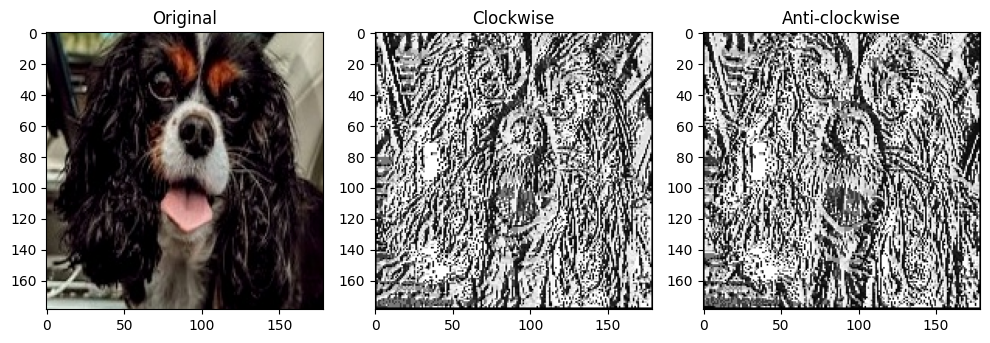

In [34]:
# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Clockwise Result
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(clockwise_res, cv2.COLOR_BGR2RGB))
plt.title('Clockwise')

# Anti-clockwise Result
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(anti_clockwise_res, cv2.COLOR_BGR2RGB))
plt.title('Anti-clockwise')

plt.tight_layout()
plt.show()